# convolutional neural network (CNN) to classify medical X-ray images and detect pneumonia


### Importing the libraries


In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing


In [46]:
TRAINING_SET_DIR = "/Users/sivaram/Developer/SDS/SuperDataScience-Community-Projects/datasets/chest_xray/train"
TEST_SET_DIR = "/Users/sivaram/Developer/SDS/SuperDataScience-Community-Projects/datasets/chest_xray/test"
VALIDATION_SET_DIR = "/Users/sivaram/Developer/SDS/SuperDataScience-Community-Projects/datasets/chest_xray/val"


### Preprocessing the Training set

In [65]:
# Image augmentation gives variety and diversity of training set to avoid overfitting
train_datagen= ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.05,
    height_shift_range = 0.05,
    zoom_range = 0.05,
    horizontal_flip = False,
    fill_mode = 'nearest'
)
training_set = train_datagen.flow_from_directory(TRAINING_SET_DIR,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 shuffle = False)


Found 5216 images belonging to 2 classes.


In [48]:
labels = (training_set.class_indices)
print(labels)

{'NORMAL': 0, 'PNEUMONIA': 1}


### Preprocessing the test set


In [63]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(TEST_SET_DIR,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 shuffle=False)

Found 624 images belonging to 2 classes.


In [64]:
labels = (test_set.class_indices)
print(labels)

{'NORMAL': 0, 'PNEUMONIA': 1}


### Preprocessing the validation set


In [62]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(VALIDATION_SET_DIR,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 shuffle=False)

Found 16 images belonging to 2 classes.


In [52]:
labels = (val_set.class_indices)
print(labels)

{'NORMAL': 0, 'PNEUMONIA': 1}


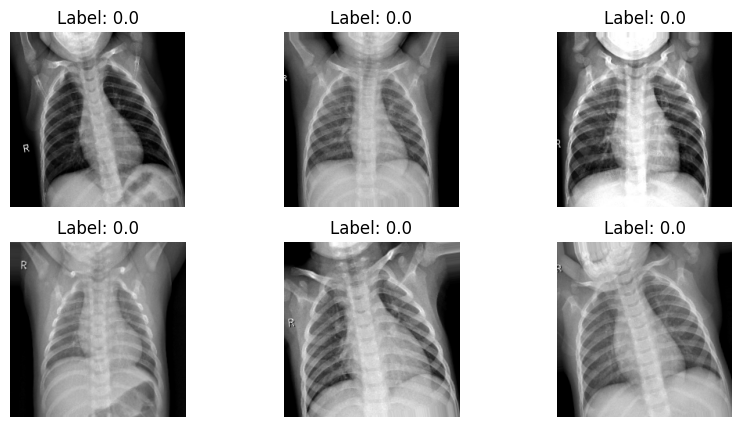

In [69]:
images, labels = next(training_set)

# Display the first 6 images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])  # Display the image
    plt.title(f"Label: {labels[i]}")  # Show label
    plt.axis('off')  # Hide axis
plt.show()

## Part 2 - Building the CNN


### Initialising the CNN

In [82]:
cnn = tf.keras.models.Sequential()


### Step 1 - Convolution

In [85]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 1]))


### Step 2 - Pooling

In [86]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


### Adding a second convolutional layer


In [87]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [88]:
cnn.add(tf.keras.layers.Flatten())


### Step 4 - Full Connection

In [89]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


### Step 5 - Output Layer

In [90]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


## Part 3 - Training the CNN


### Compiling the CNN

In [91]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


### Training the CNN on the Training set and evaluating it on the Test set


In [94]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)


Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 935ms/step - accuracy: 0.7050 - loss: 0.9763 - val_accuracy: 0.7708 - val_loss: 0.6055
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 161s 985ms/step - accuracy: 0.8210 - loss: 0.5088 - val_accuracy: 0.6394 - val_loss: 0.9521
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 155s 948ms/step - accuracy: 0.8050 - loss: 0.4041 - val_accuracy: 0.7612 - val_loss: 0.8135
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 956ms/step - accuracy: 0.8759 - loss: 0.2976 - val_accuracy: 0.7035 - val_loss: 0.5761
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 154s 943ms/step - accuracy: 0.8956 - loss: 0.2660 - val_accuracy: 0.8429 - val_loss: 0.4210
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 154s 947ms/step - accuracy: 0.9120 - loss: 0.2323 - val_accuracy: 0.7532 - val_loss: 0.4223
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 953ms/step - accuracy: 0.9116 - loss: 0.2340 - val_accuracy: 0.7179 - val_loss: 0.6737
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 935ms/step - accuracy: 0.9124 -

In [96]:
cnn.save('sivarama-pneumonia_detection-CNN.keras')

In [100]:
loss = history.history['loss']
val_loss = history.history['val_loss']

 Plotting Loss Vs Num. of Epochs

Loss Vs Num. of Epochs
Training Loss : 0.0519 
Value loss : 0.0701


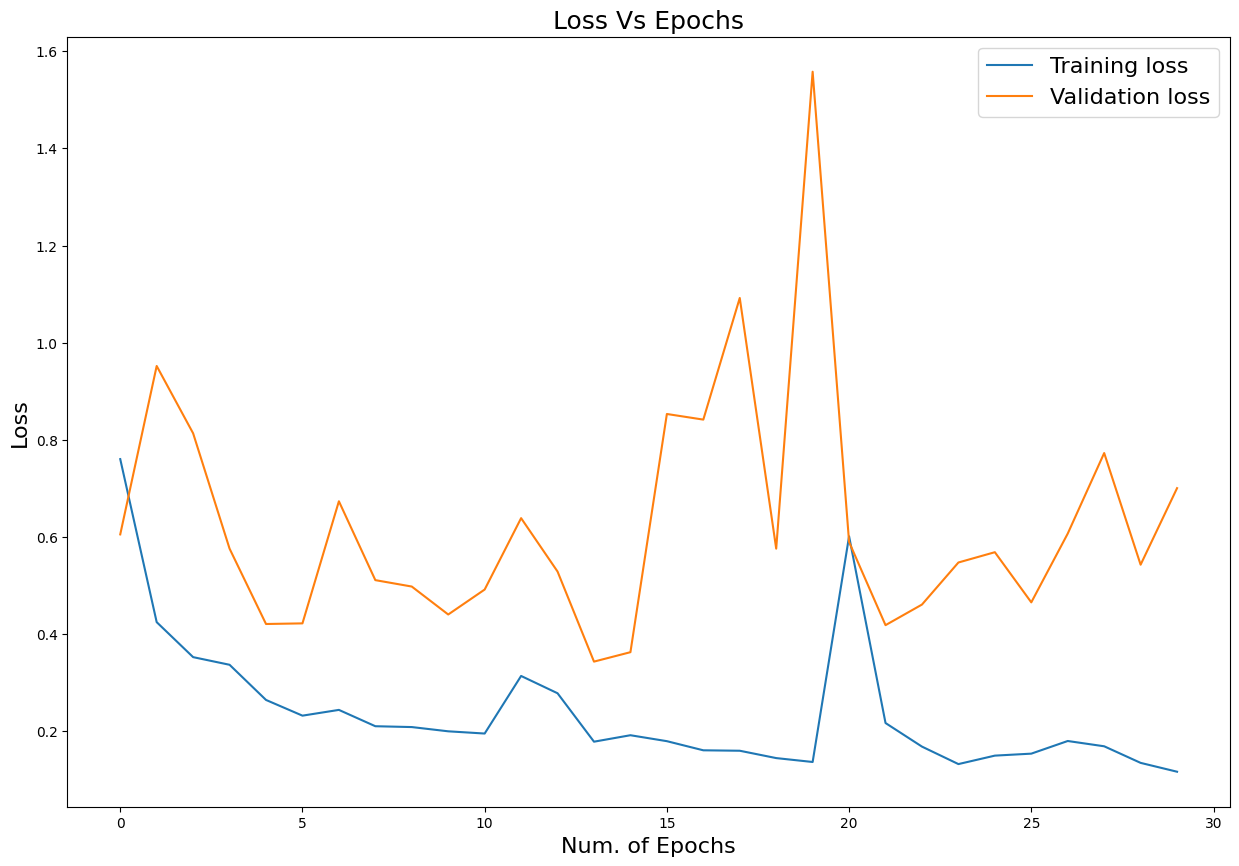

In [101]:
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.0519","\nValue loss : 0.0701")
plt.show()

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Plotting Accuracy Vs Num. of Epochs


Accuracy Vs Epochs
Training accuracy : 0.9816 
Value accuracy : 1.0000


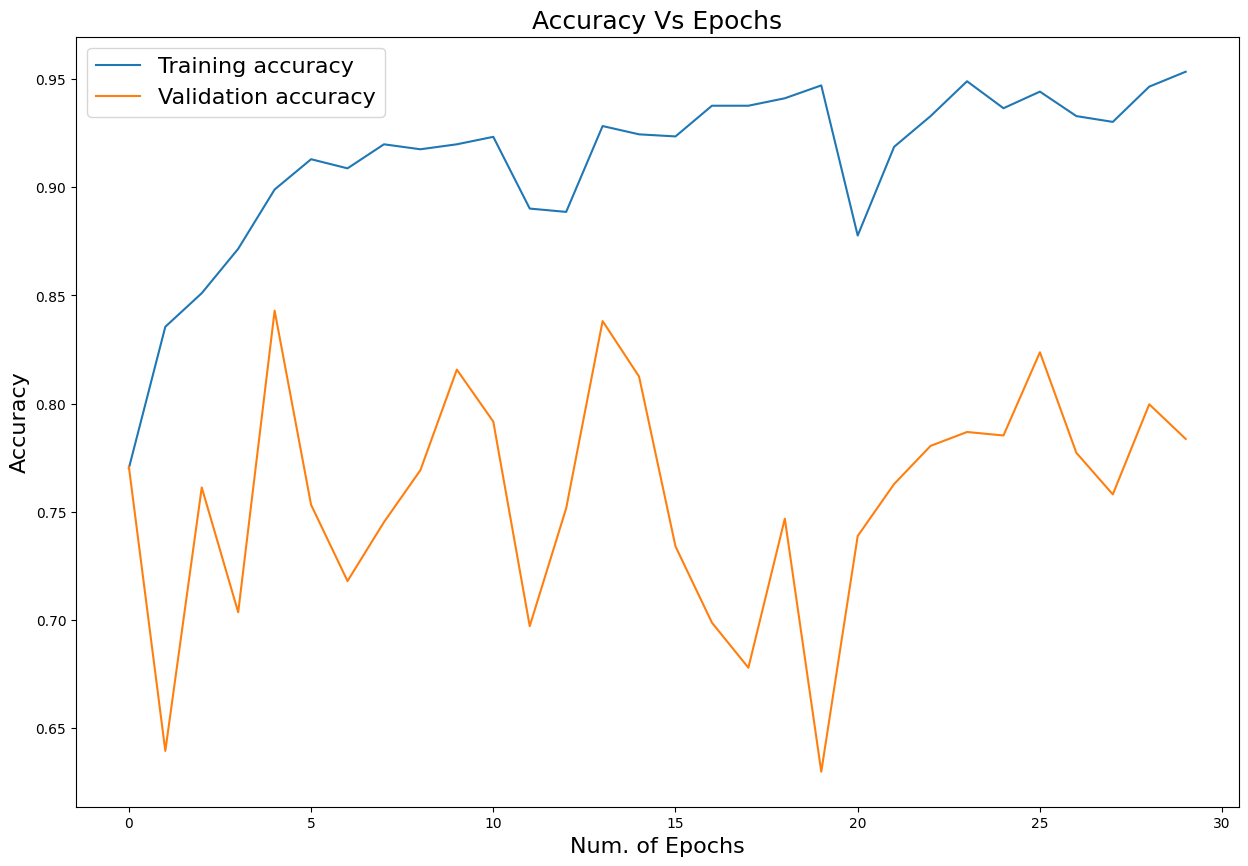

In [104]:
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.9816","\nValue accuracy : 1.0000")
plt.show()

## Part 4 - Making a single prediction


In [108]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img(
    VALIDATION_SET_DIR + "/PNEUMONIA/person1946_bacteria_4874.jpeg",
    target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'PNEUMONIA'
else:
    prediction = 'NORMAL'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [109]:
print(prediction)

PNEUMONIA


In [99]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]
from tensorflow.keras.preprocessing import image
import numpy as np

def prepare(filepath):
    test_image = image.load_img(filepath, target_size=(224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    return  test_image


model = tf.keras.models.load_model('sivarama-pneumonia_detection-CNN.keras')

prediction = model.predict(prepare(TEST_SET_DIR + "/NORMAL/IM-0015-0001.jpeg"))
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[1.]]
PNEUMONIA
